In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-data/customer_segmentation_data.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("/kaggle/input/customer-segmentation-data/customer_segmentation_data.csv")
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns.tolist())



Shape of dataset: (53503, 20)

Column names:
 ['Customer ID', 'Age', 'Gender', 'Marital Status', 'Education Level', 'Geographic Information', 'Occupation', 'Income Level', 'Behavioral Data', 'Purchase History', 'Interactions with Customer Service', 'Insurance Products Owned', 'Coverage Amount', 'Premium Amount', 'Policy Type', 'Customer Preferences', 'Preferred Communication Channel', 'Preferred Contact Time', 'Preferred Language', 'Segmentation Group']


In [4]:
 df.head()

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2


In [5]:
print(df["Age"].max())
print(df["Age"].min())

70
18


In [6]:
print("\nMissing values per column:\n", df.isnull().sum())



Missing values per column:
 Customer ID                           0
Age                                   0
Gender                                0
Marital Status                        0
Education Level                       0
Geographic Information                0
Occupation                            0
Income Level                          0
Behavioral Data                       0
Purchase History                      0
Interactions with Customer Service    0
Insurance Products Owned              0
Coverage Amount                       0
Premium Amount                        0
Policy Type                           0
Customer Preferences                  0
Preferred Communication Channel       0
Preferred Contact Time                0
Preferred Language                    0
Segmentation Group                    0
dtype: int64


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,53503.0,52265.204998,28165.000067,1.0,28950.5,55858.0,76096.0,100000.0
Age,53503.0,44.140945,15.079486,18.0,32.0,43.0,57.0,70.0
Income Level,53503.0,82768.324318,36651.075670,20001.0,51568.5,80719.0,115973.5,149999.0
Coverage Amount,53503.0,492580.789638,268405.505571,50001.0,249613.5,477261.0,739124.0,1000000.0
Premium Amount,53503.0,3023.702447,1285.834295,500.0,1817.0,3194.0,4311.5,5000.0


In [8]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values → {df[col].unique()[:10]}")

Gender: 2 unique values → ['Female' 'Male']
Marital Status: 5 unique values → ['Married' 'Widowed' 'Single' 'Divorced' 'Separated']
Education Level: 5 unique values → ['Associate Degree' 'Doctorate' "Bachelor's Degree" "Master's Degree"
 'High School Diploma']
Geographic Information: 35 unique values → ['Mizoram' 'Goa' 'Rajasthan' 'Sikkim' 'West Bengal' 'Uttar Pradesh'
 'Himachal Pradesh' 'Manipur' 'Gujarat' 'Andaman and Nicobar Islands']
Occupation: 9 unique values → ['Entrepreneur' 'Manager' 'Nurse' 'Artist' 'Salesperson' 'Lawyer'
 'Teacher' 'Doctor' 'Engineer']
Behavioral Data: 5 unique values → ['policy5' 'policy1' 'policy3' 'policy2' 'policy4']
Purchase History: 2016 unique values → ['04-10-2018' '11-06-2018' '06-05-2021' '09-02-2018' '09-10-2018'
 '9/19/2020' '07-04-2021' '11-01-2021' '9/20/2020' '4/24/2020']
Interactions with Customer Service: 5 unique values → ['Phone' 'Chat' 'Email' 'Mobile App' 'In-Person']
Insurance Products Owned: 5 unique values → ['policy2' 'policy1' 'pol

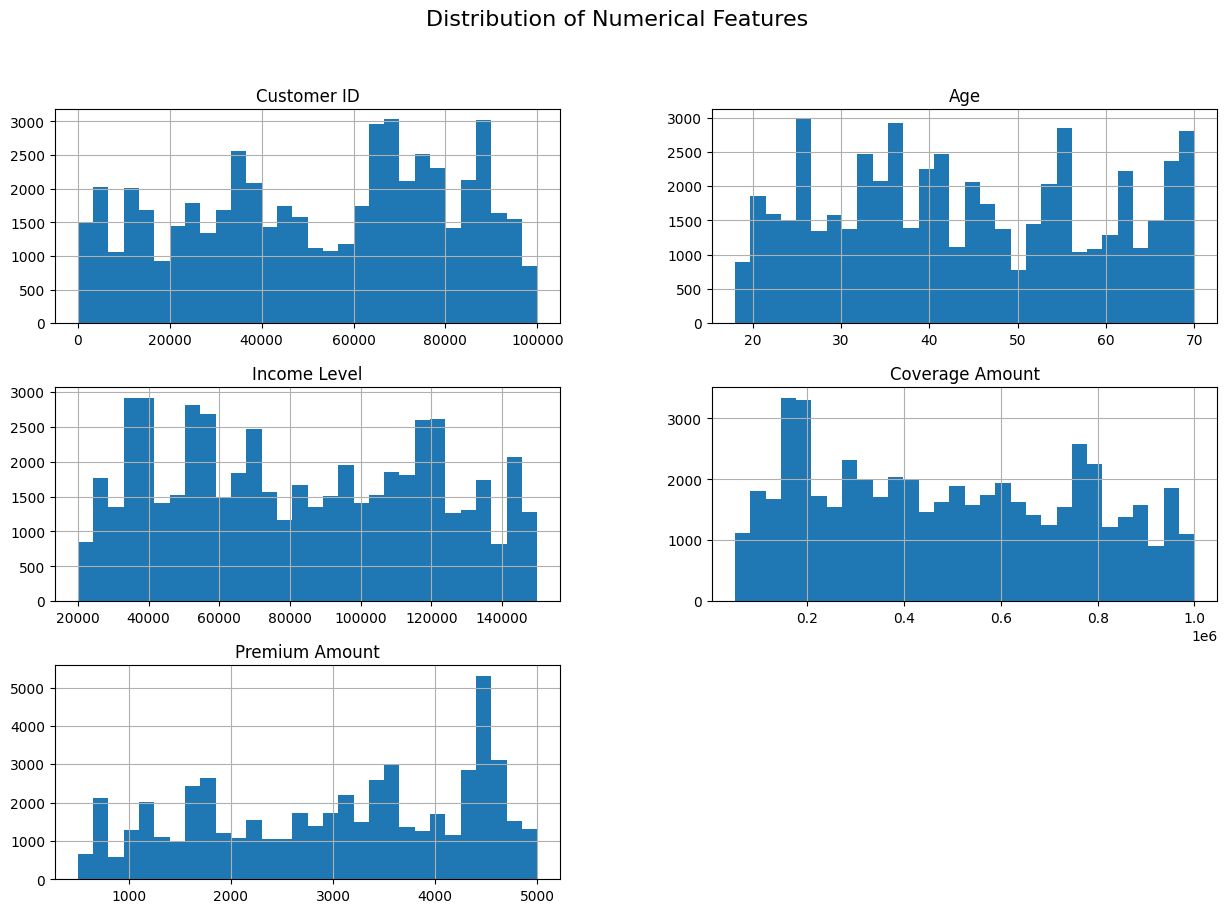

In [9]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].hist(figsize=(15, 10), bins=30)
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

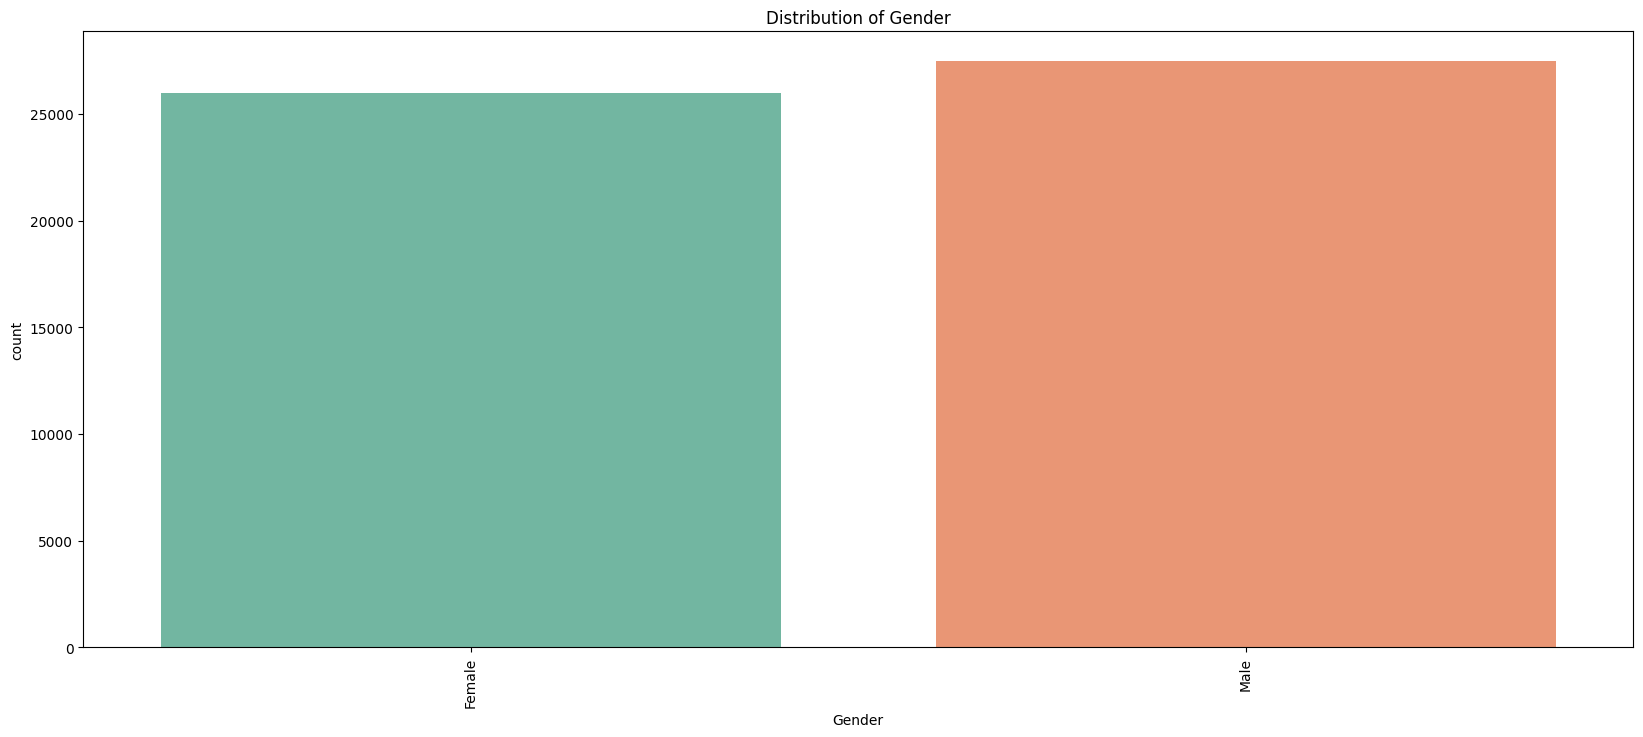

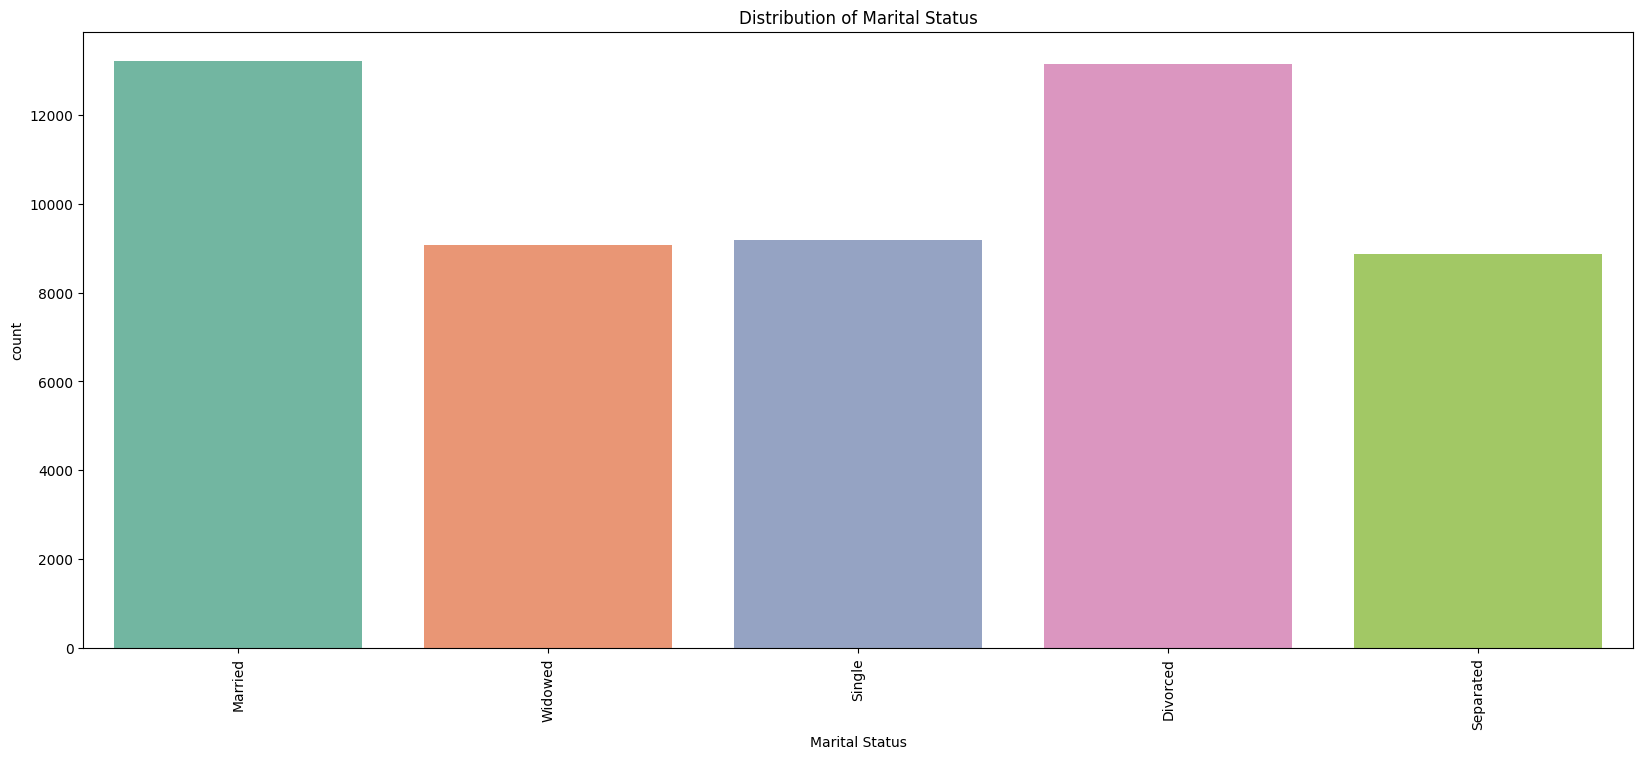

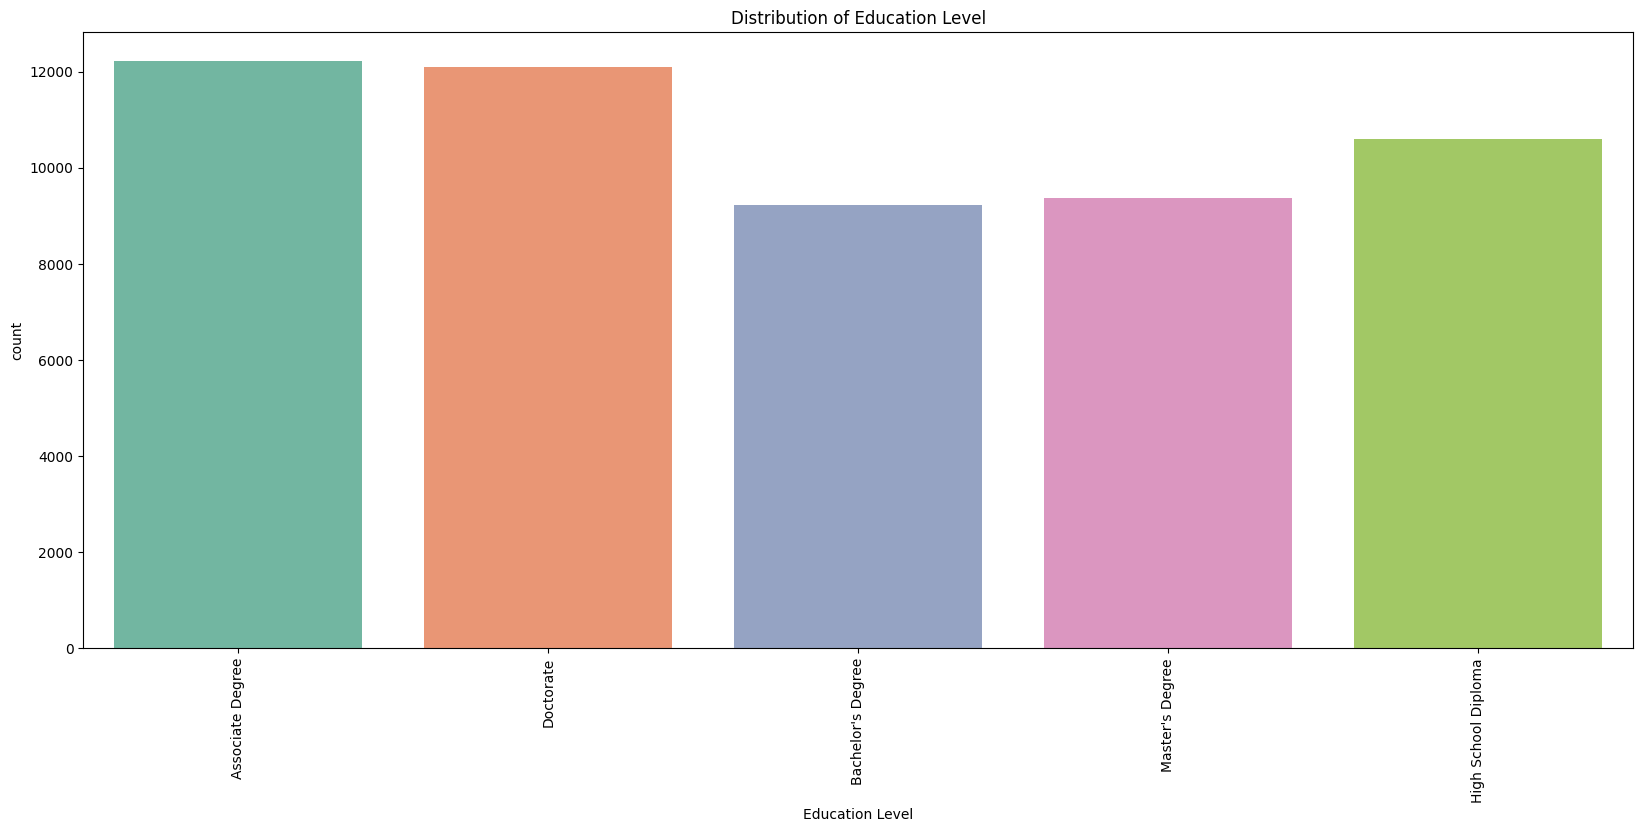

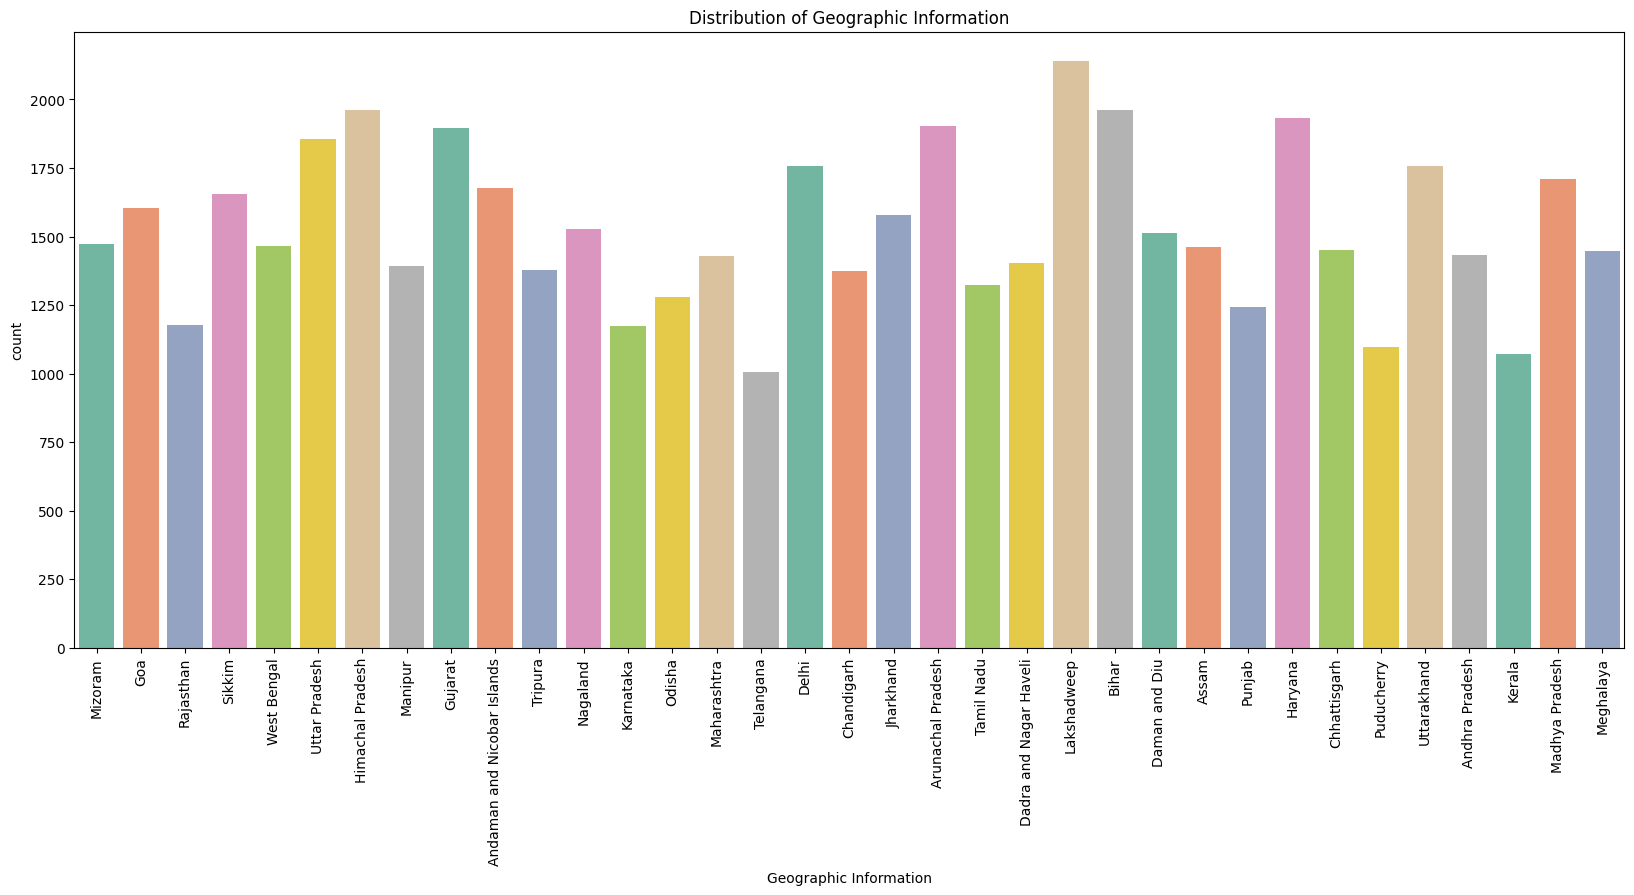

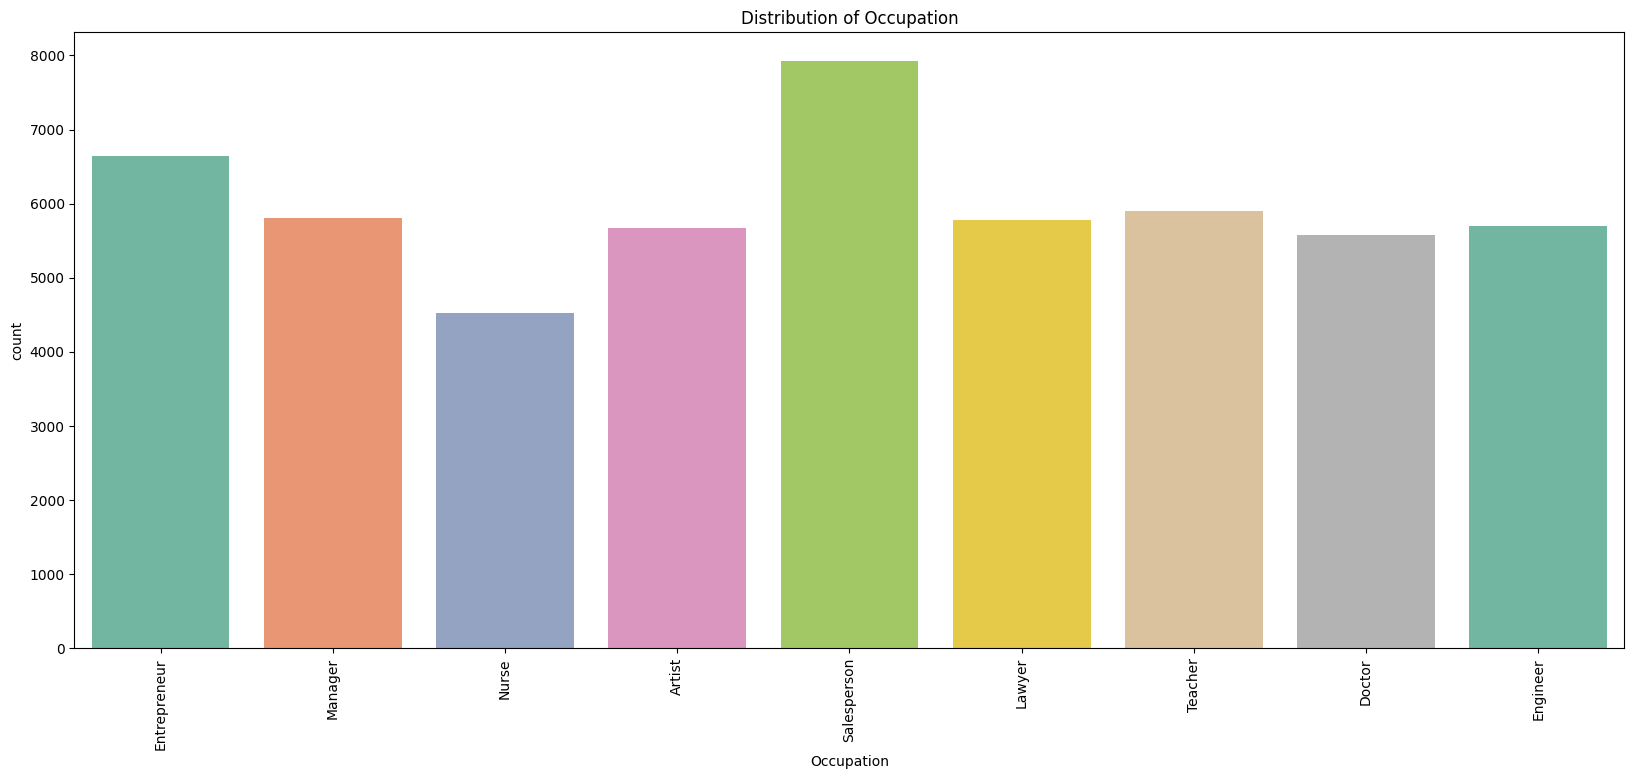

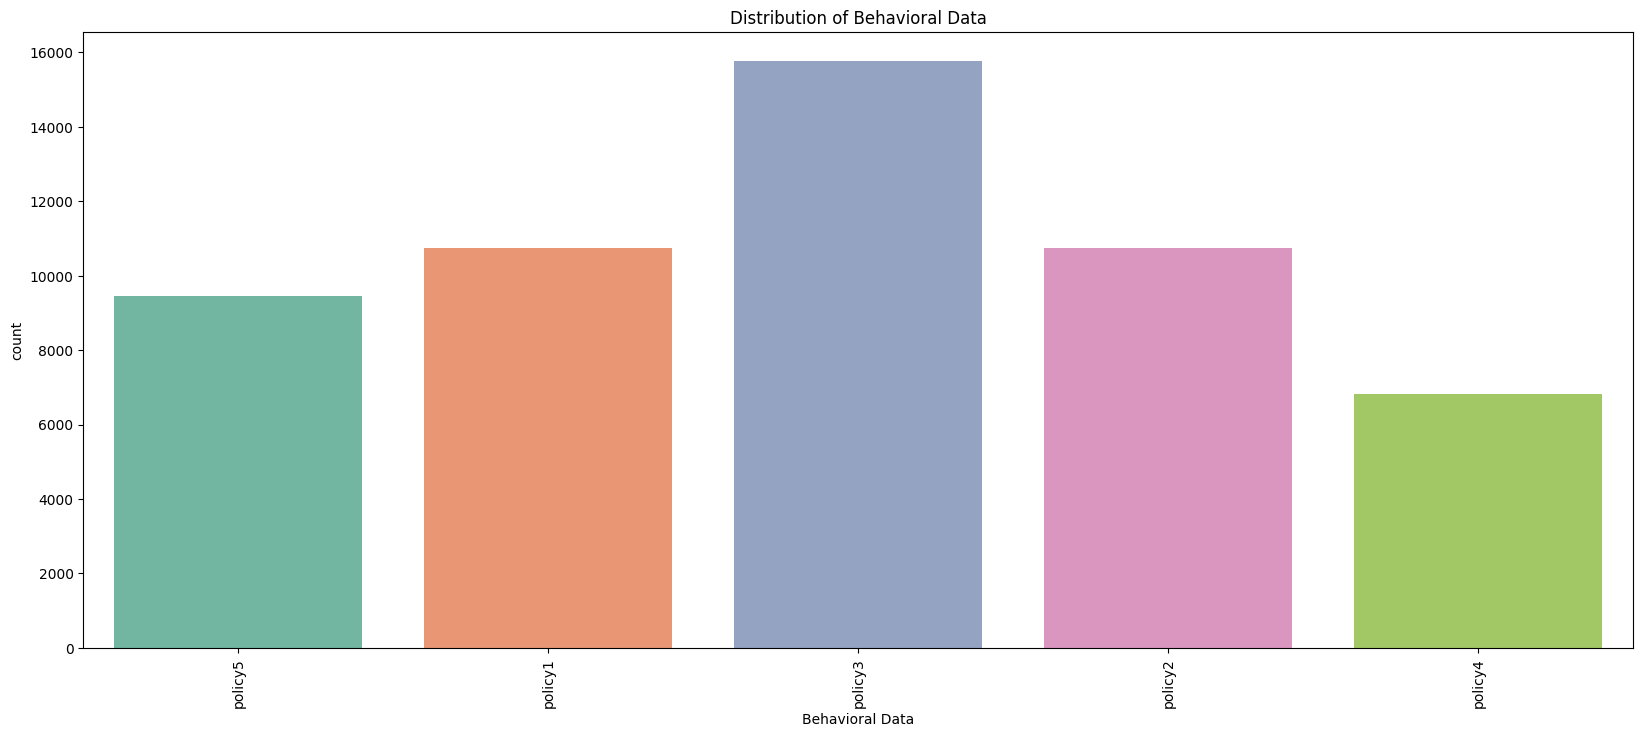

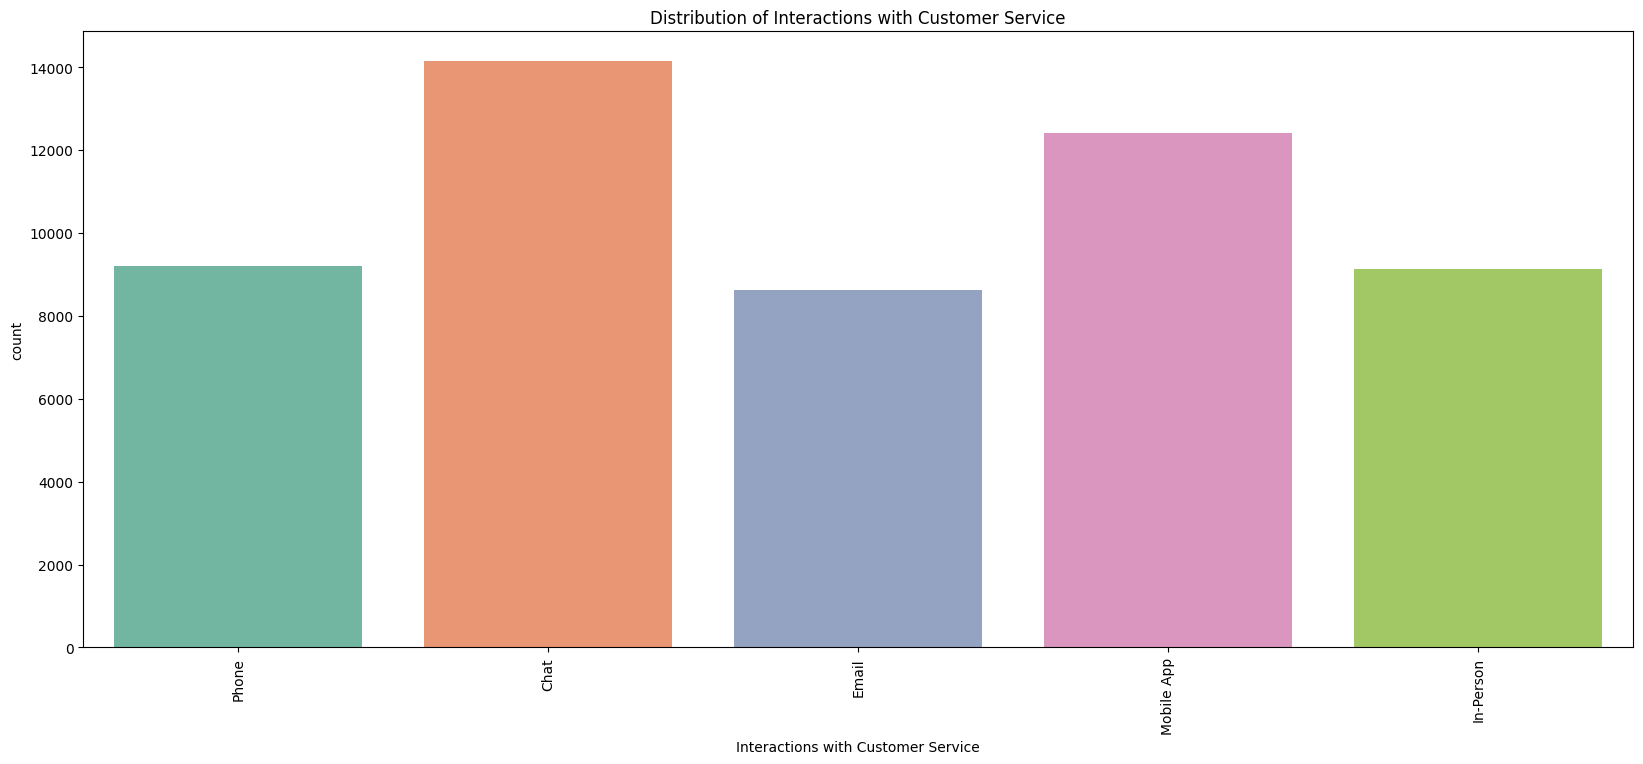

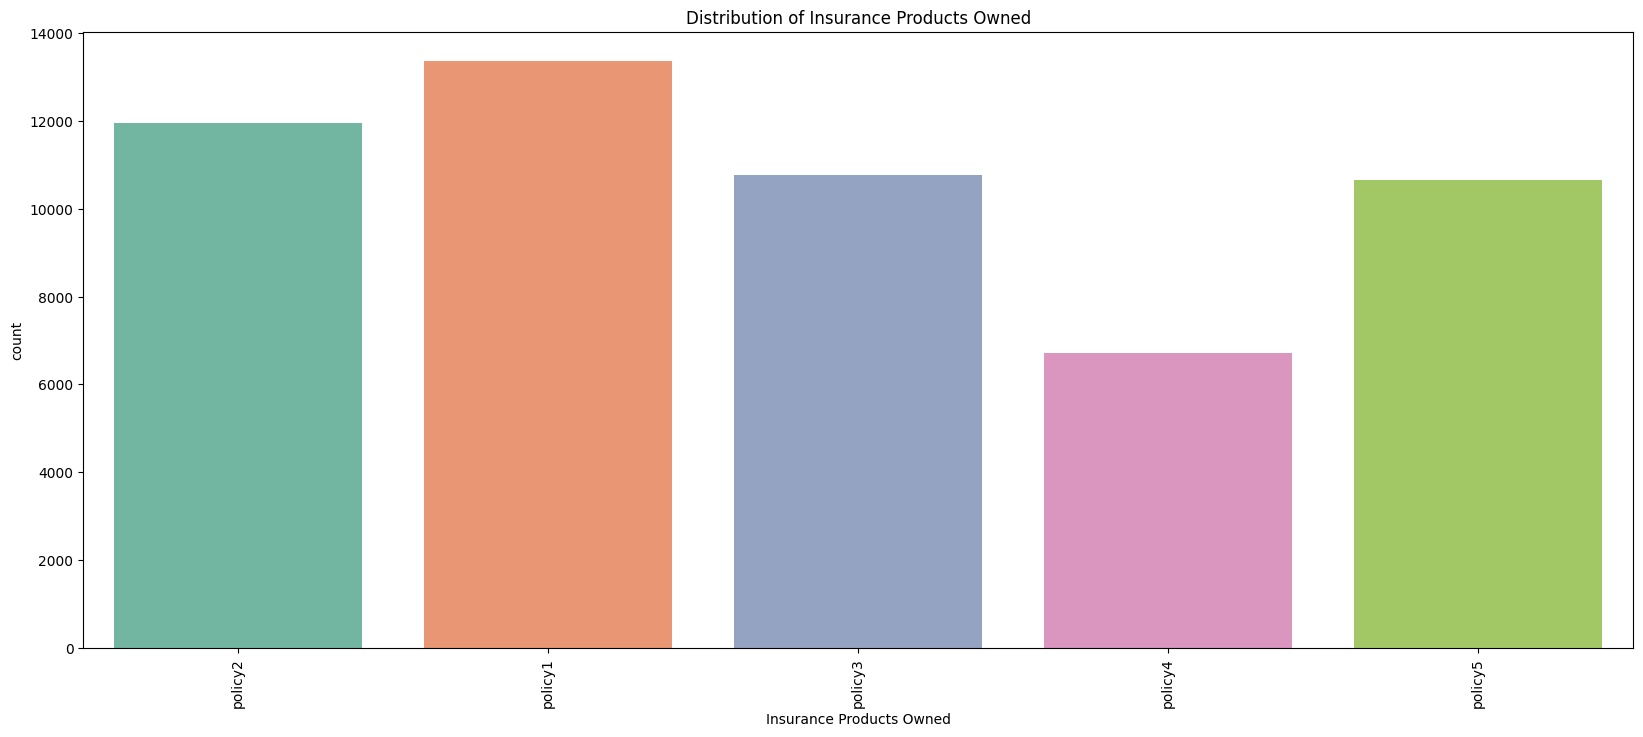

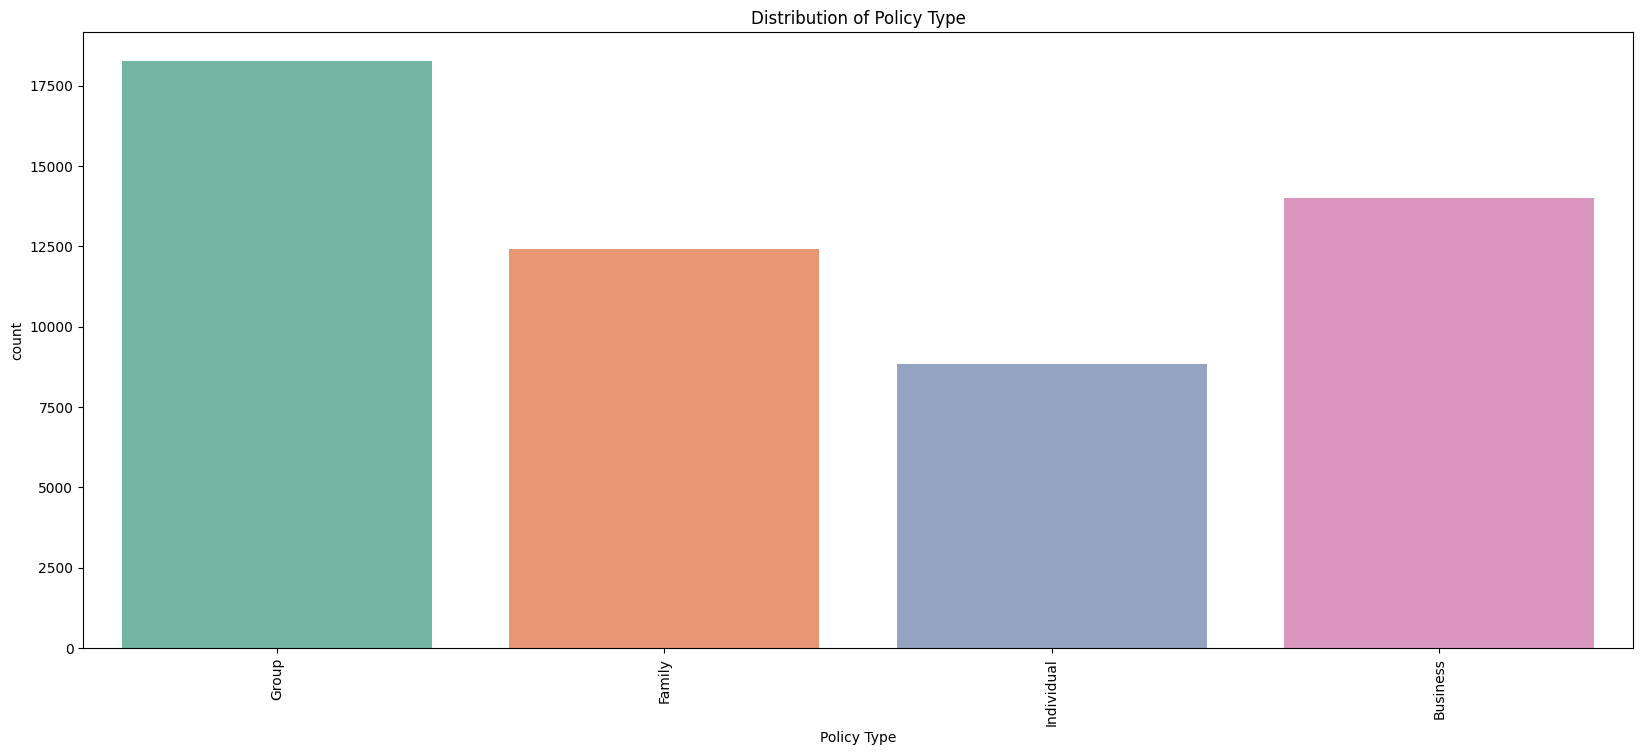

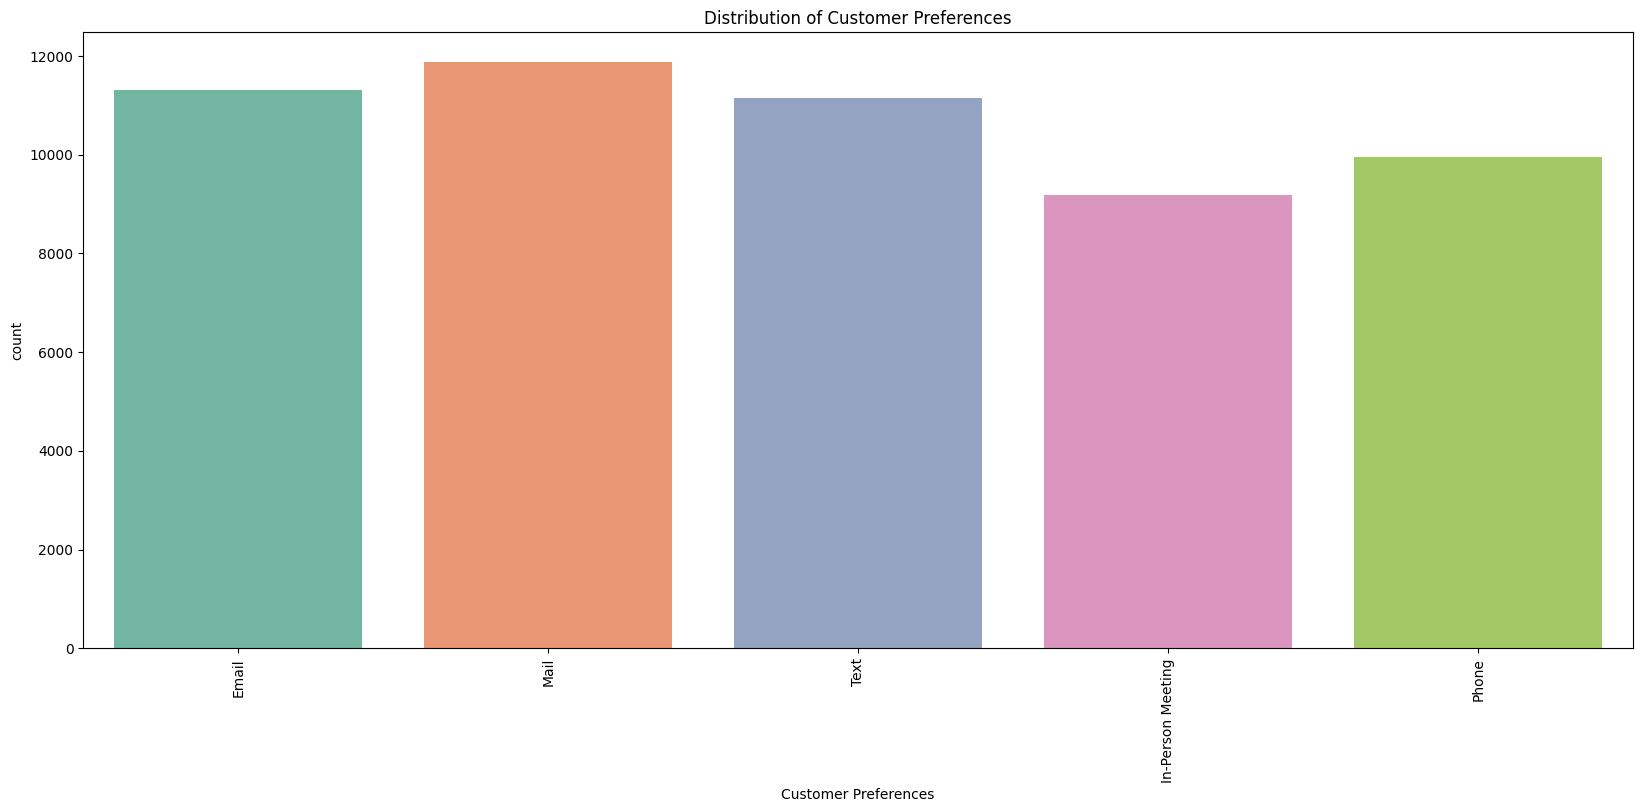

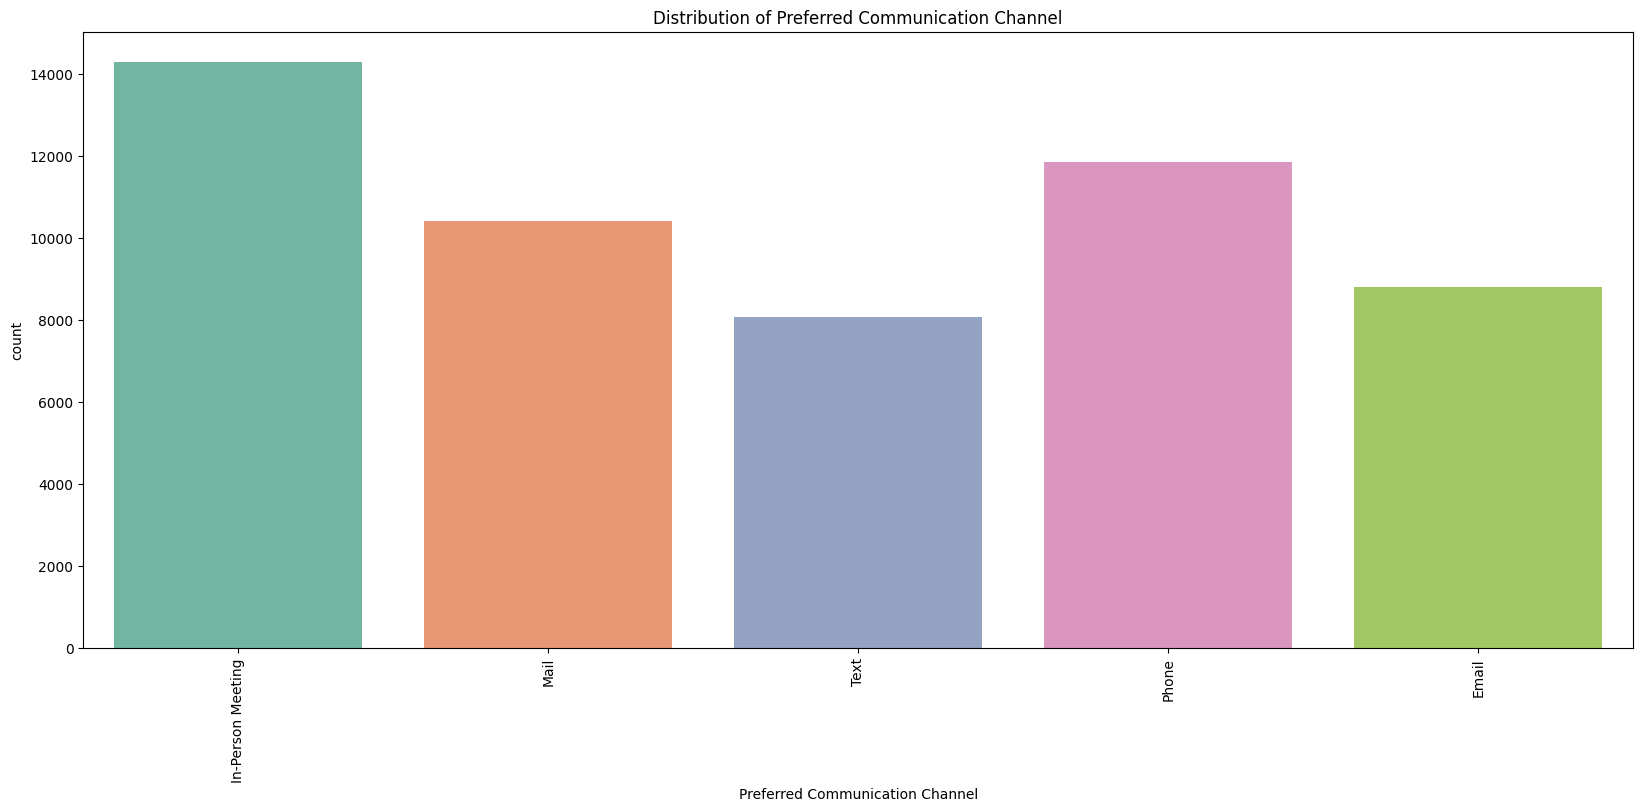

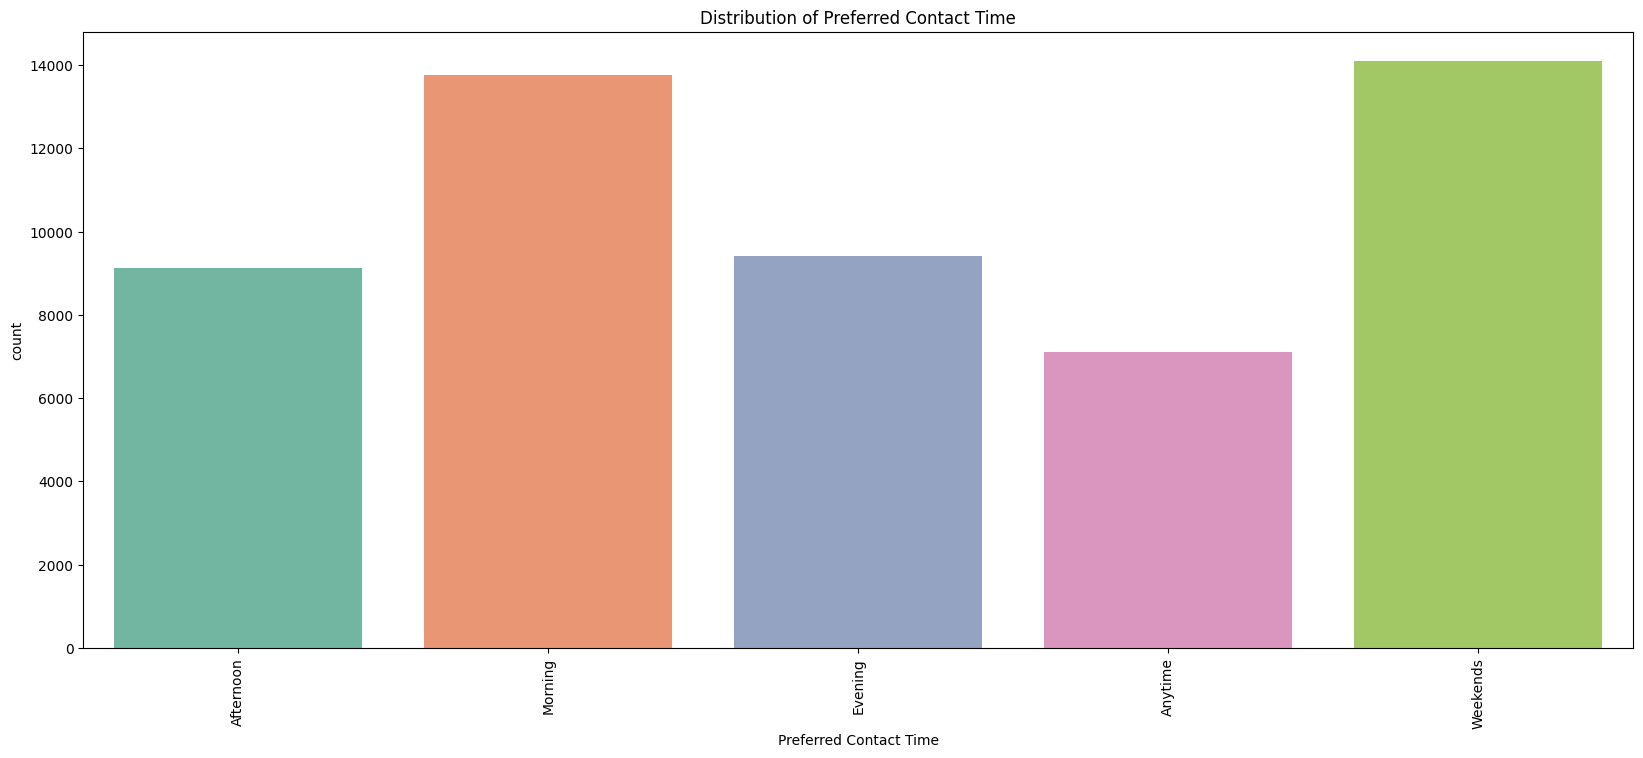

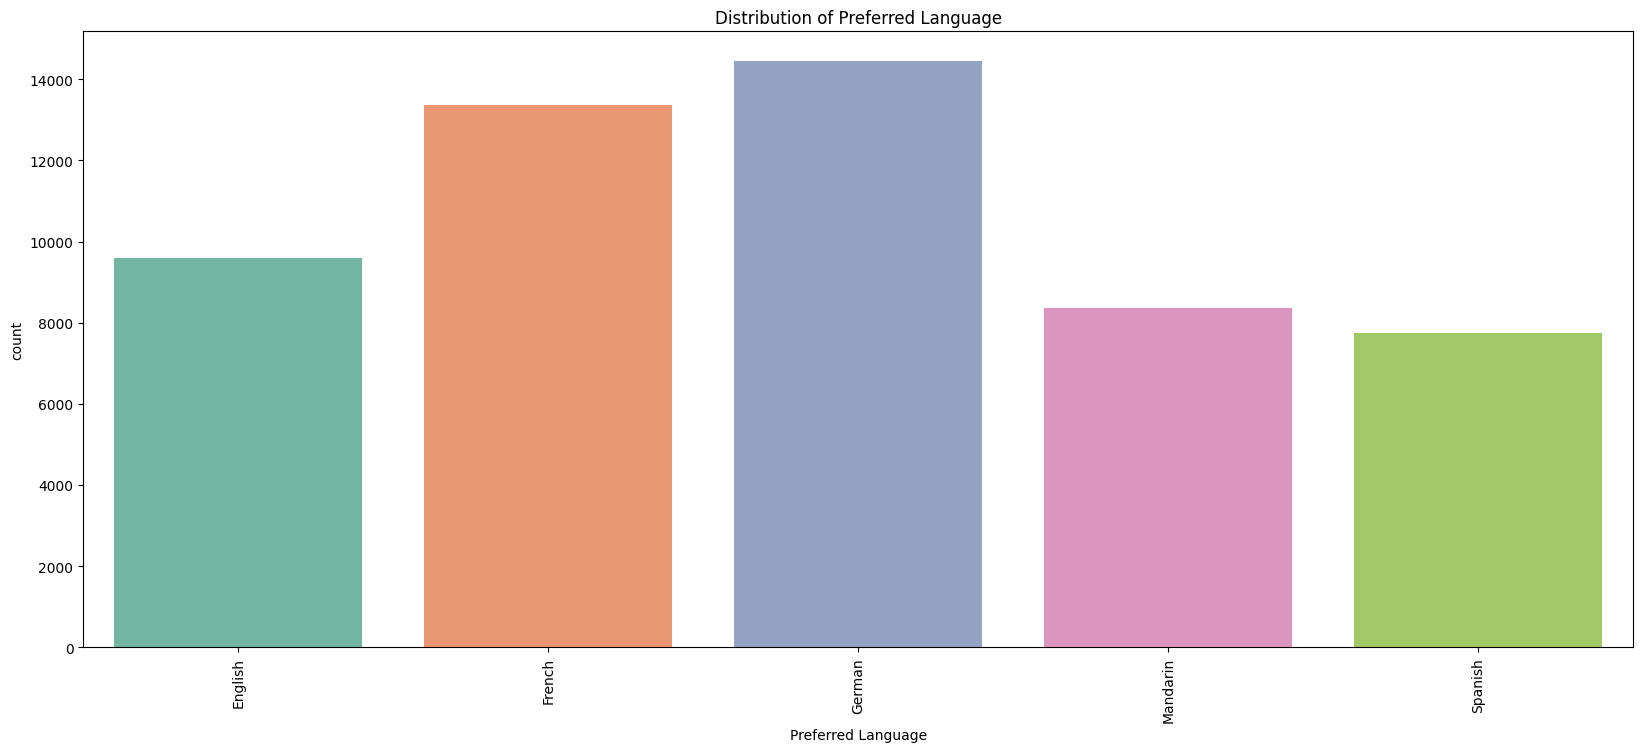

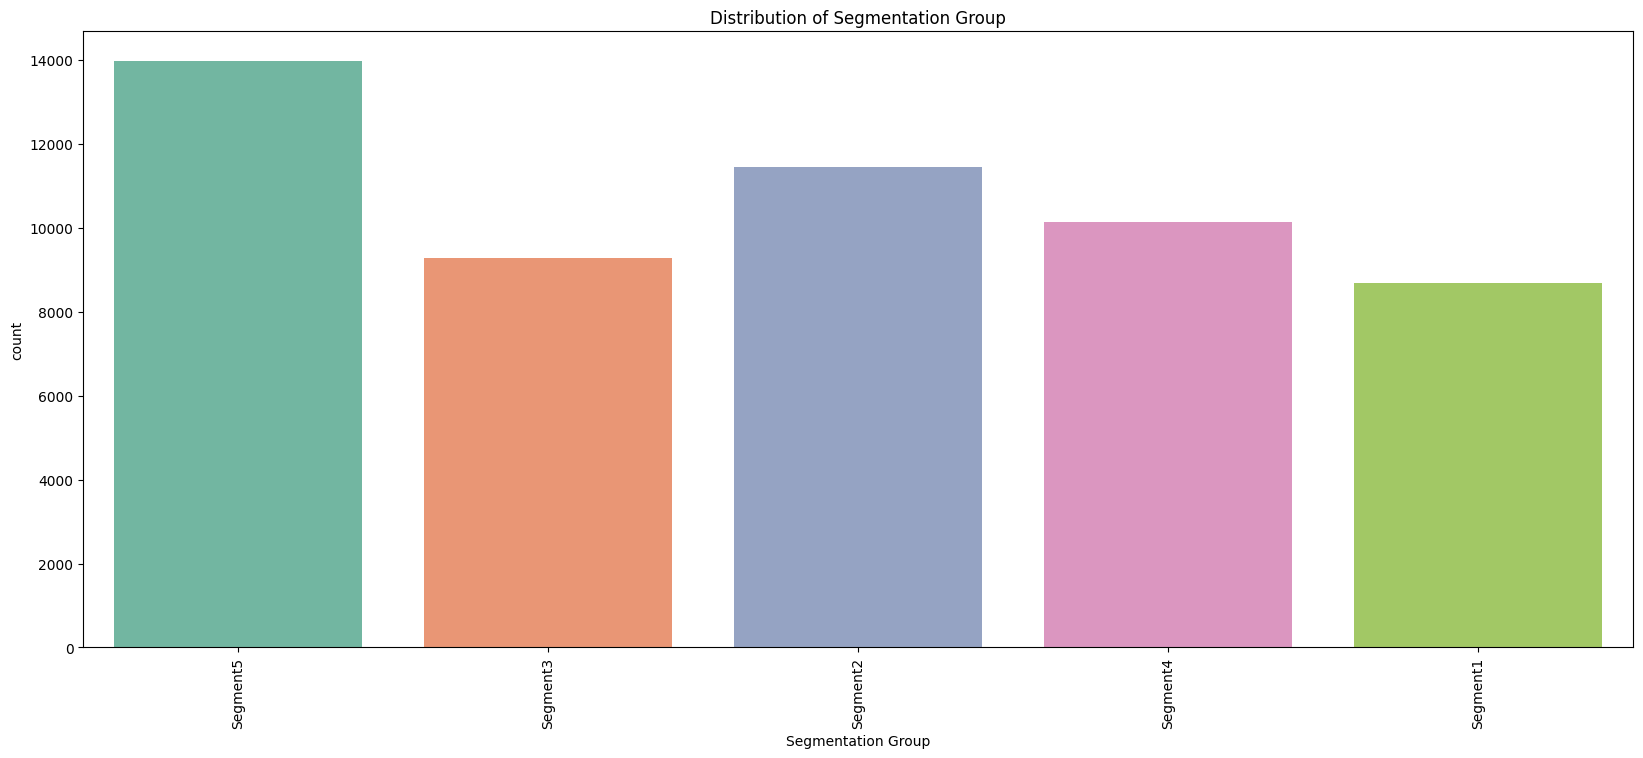

In [10]:
cols_to_plot = [col for col in cat_cols if col != "Purchase History"]
for col in cols_to_plot:
    plt.figure(figsize=(20,8))
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=90)
    plt.show()

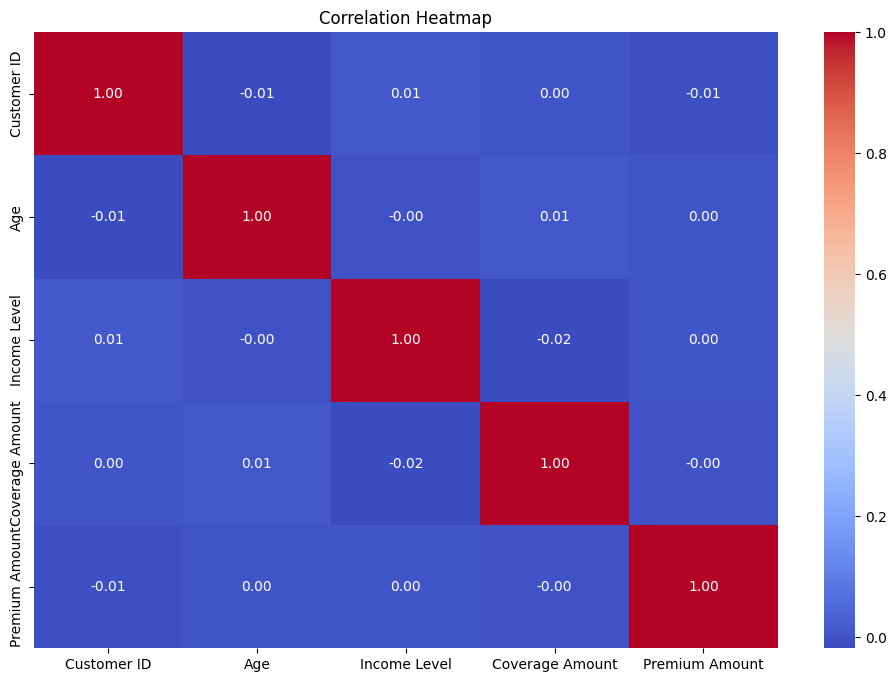

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

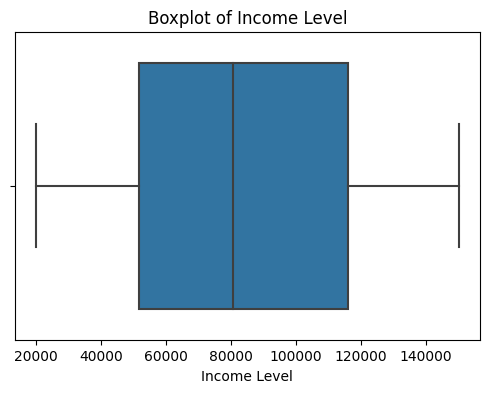

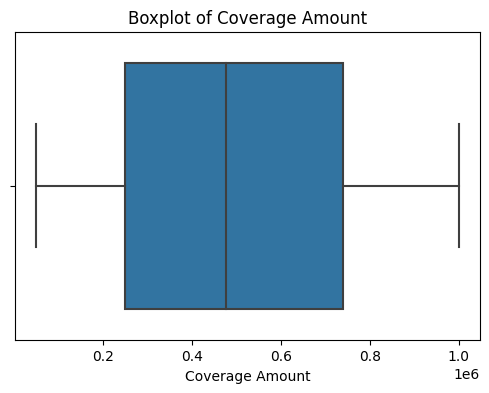

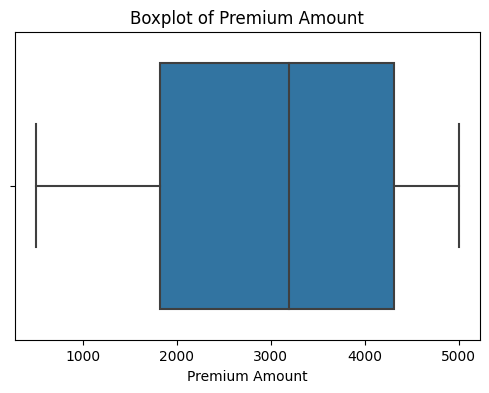

In [12]:
num_cols = ['Income Level',	'Coverage Amount','Premium Amount']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [13]:
df


,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53498,44809,35,Female,Divorced,Associate Degree,Andaman and Nicobar Islands,Salesperson,120850,policy3,01-01-2019,Mobile App,policy1,586401,4404,Family,In-Person Meeting,Phone,Afternoon,German,Segment5
53499,65485,61,Male,Single,Doctorate,Himachal Pradesh,Entrepreneur,122309,policy5,5/18/2021,Mobile App,policy4,637733,1285,Group,Text,Mail,Afternoon,German,Segment1
53500,26213,25,Male,Divorced,Doctorate,Assam,Teacher,49258,policy2,11/27/2018,In-Person,policy1,631057,4407,Individual,Text,Text,Weekends,French,Segment4
53501,63136,42,Male,Married,Doctorate,Andhra Pradesh,Artist,66301,policy4,06-04-2021,In-Person,policy1,730385,4482,Business,Mail,Phone,Morning,French,Segment5


In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [15]:
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [16]:
df


,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,0,1,0,22,3,70541,4,270,4,1,366603,2749,2,0,1,0,0,4
1,95568,26,1,4,2,10,5,54168,4,942,0,0,780236,1966,2,2,1,3,1,4
2,10544,29,0,3,0,27,3,73899,4,387,1,2,773926,4413,2,0,2,2,2,2
3,77033,20,1,0,1,28,3,63381,4,582,0,1,787815,4342,1,4,1,1,1,2
4,88160,25,0,2,1,34,5,38794,0,630,0,3,366506,1276,1,0,4,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53498,44809,35,0,0,0,0,7,120850,2,1,3,0,586401,4404,1,1,3,0,2,4
53499,65485,61,1,3,2,13,3,122309,4,1569,3,3,637733,1285,2,4,2,0,2,0
53500,26213,25,1,0,2,3,8,49258,1,1068,2,0,631057,4407,3,4,4,4,1,3
53501,63136,42,1,1,2,1,0,66301,3,381,2,0,730385,4482,0,2,3,3,1,4


In [17]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [22]:
df.head()

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,...,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group,Demographic_Score
0,1.161055,-1.401980,0,1,0,22,3,-0.333617,4,270,...,1,-0.469361,-0.213640,2,0,1,0,0,4,4.099670
1,1.537483,-1.203033,1,4,2,10,5,-0.780348,4,942,...,0,1.071729,-0.822588,2,2,1,3,1,4,3.466161
2,-1.481328,-1.004085,0,3,0,27,3,-0.241996,4,387,...,2,1.048219,1.080474,2,0,2,2,2,2,5.332652
3,0.879390,-1.600928,1,0,1,28,3,-0.528975,4,582,...,1,1.099966,1.025256,1,4,1,1,1,2,5.233179
4,1.274459,-1.269349,0,2,1,34,5,-1.199821,0,630,...,3,-0.469722,-1.359210,1,0,4,4,0,1,6.788442


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

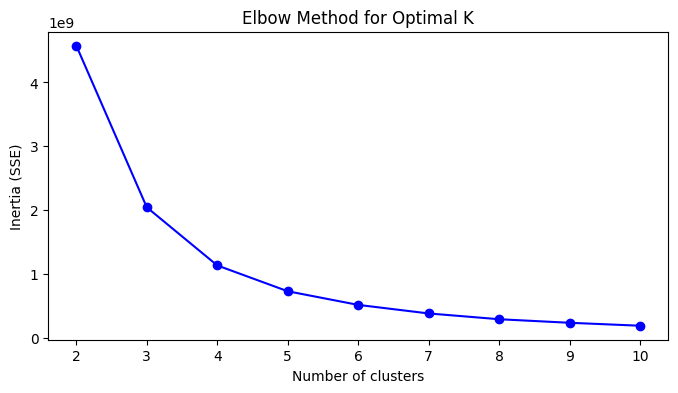

In [83]:
# Step 4 & 5: Customer Segmentation using K-Means
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

X = df.copy()  # Using all features for clustering

inertia = []
sil_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, kmeans.labels_))

# Elbow Method
plt.figure(figsize=(8,4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method for Optimal K')
plt.show()





/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


✅ KMeans clustering done with K=3

Cluster counts:
 Cluster
2    18106
1    17809
0    17588
Name: count, dtype: int64


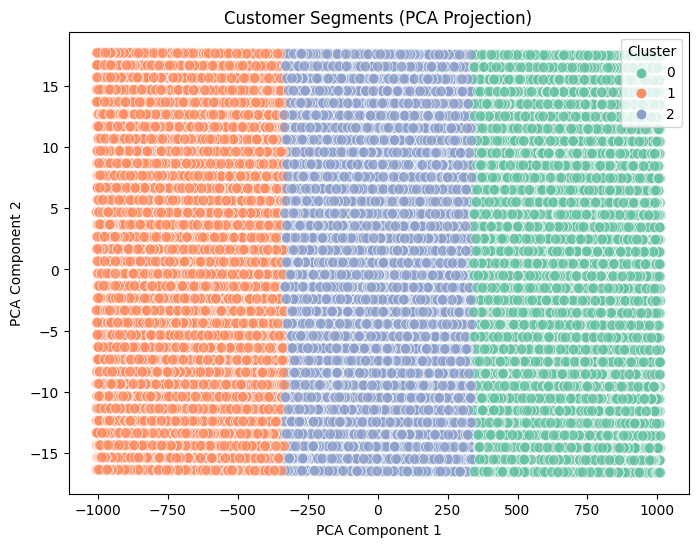

In [84]:
# Step 5: Final KMeans Clustering with K=3
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# 1. Apply KMeans with K=3
# -------------------------------
X = df.drop(columns=['Cluster'], errors='ignore')  # remove old cluster if exists

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

print("✅ KMeans clustering done with K=3")
print("\nCluster counts:\n", df['Cluster'].value_counts())

# -------------------------------
# 2. Visualize clusters (PCA 2D)
# -------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], 
                palette="Set2", s=60, alpha=0.7)
plt.title("Customer Segments (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.show()


